<a href="https://colab.research.google.com/github/WoogiWooks/Kaggle_ML/blob/main/Feature_Selection_%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

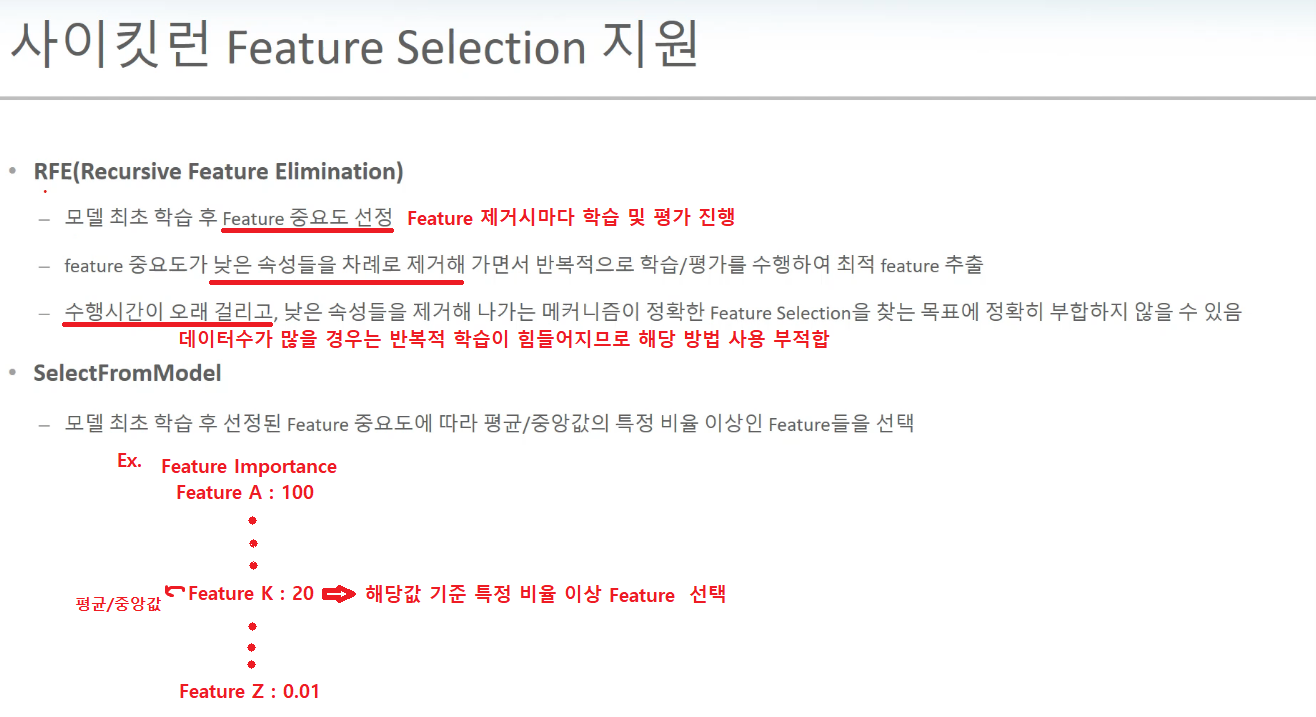

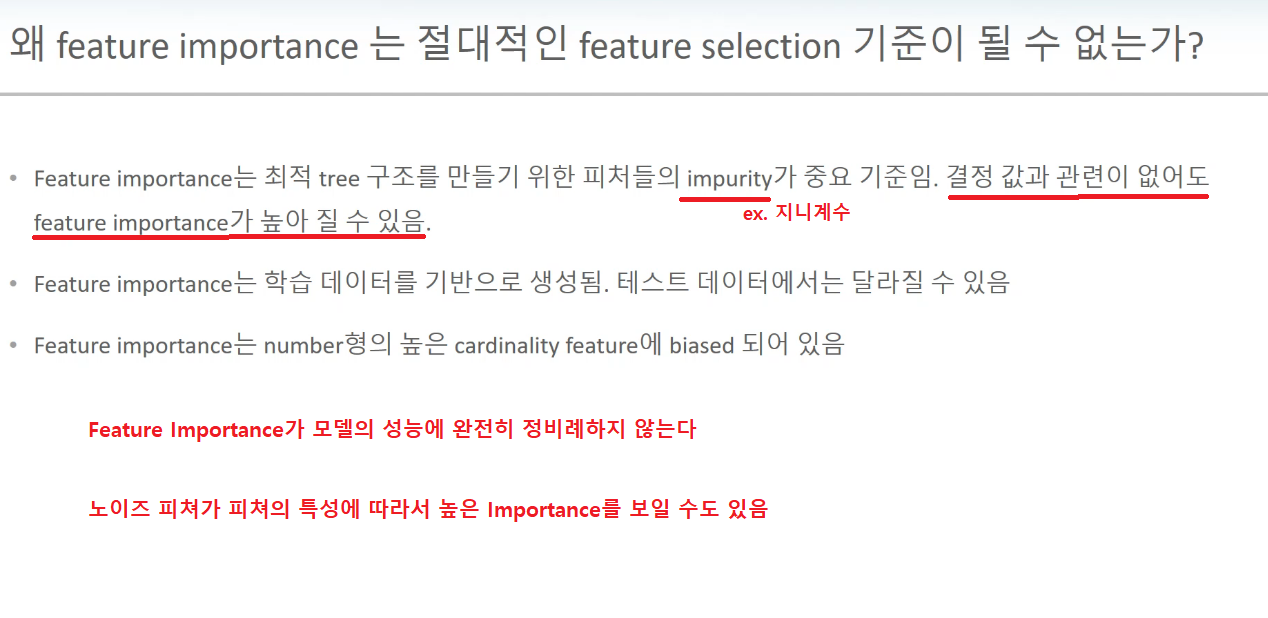

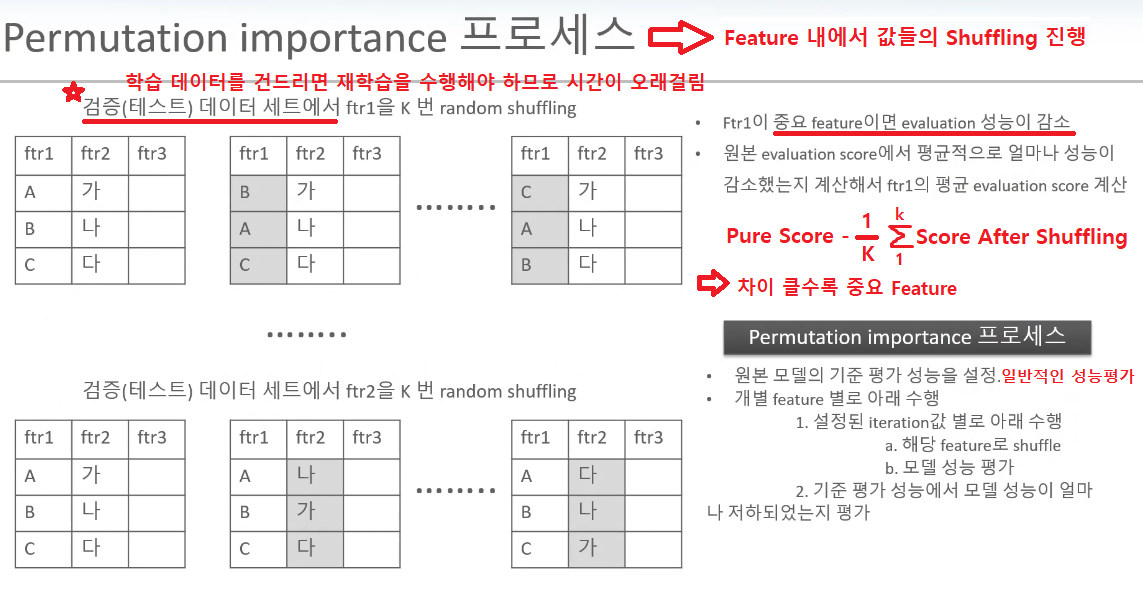

# **RFE (Recursive Feature Elimination**


Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


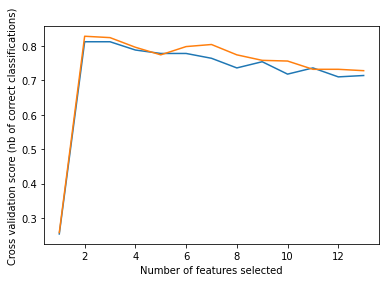

In [6]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE    # CV = Cross Validation
from sklearn.datasets import make_classification

# 분류를 위한 Feature 개수가 25개인 데이터 1000개 생성
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# SVC classifier 분류모델 선택
svc = SVC(kernel="linear")

# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
# 처음 Feature 갯수에서 step 수만큼 Feature 제거해나가며 학습/평가 수행
rfecv = RFECV(estimator=svc, step=2, cv=StratifiedKFold(2),
              scoring='accuracy', verbose=2)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# **SelectFromModel**
* 알고리즘 보다는 모듈에 가까움
* 사용자가 세운 임계점을 기준으로 Feature Selection 진행

In [7]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

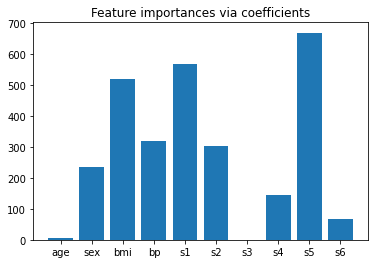

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

# 분류 아닌 회귀에서 진행
# 선형모델인 Lasso 모델 사용 => lasso.coef_
# 트리계열은 feature importance 사용하면 됨

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [11]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01   # 회귀계수 오름차순하여 3번째 큰 계수에 0.01 더한 것을 threshold 로 설정
print('threshold:', threshold)

sfm = SelectFromModel(lasso, threshold='1.5 * median').fit(X, y)   # SelectFromModle(estimator, threshold 설정값)
# sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
print("Features selected by SelectFromModel: "
      f"{feature_names[sfm.get_support()]}")

threshold: 521.748542606749
Features selected by SelectFromModel: ['bmi' 's1' 's5']


# **Permutation Importance**

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)

#학습, 예측, R Squared Score 평가 
model = Ridge(alpha=1e-2).fit(X_train, y_train)
y_pred = model.predict(X_val)
print('r2 score:', r2_score(y_val, y_pred))

r2 score: 0.35666062386954545


In [3]:
from sklearn.inspection import permutation_importance
import numpy as np

# permutation_importance(estimator, X_val, y_val, repeat Numb)
# 학습데이터 아닌 검증데이터 넣어야함!!
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)

# 가장 평균 permutation importance가 높은 순으로 내림차순 정렬 후 평균 permutation importance값과 표준 편차 출력
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(diabetes.feature_names[i],"   ", np.round(r.importances_mean[i], 4), " +/- ", np.round(r.importances_std[i], 5))

s5     0.2042  +/-  0.04965
bmi     0.1758  +/-  0.0484
bp     0.0884  +/-  0.03284
sex     0.0559  +/-  0.02319


In [9]:
# 원점수와 shuffle 후 평균점수와의 차이
# 점수 차이가 클수록 중요 feature
r.importances_mean

array([-0.00199267,  0.05587407,  0.17579   ,  0.08836513,  0.04221134,
        0.00203626,  0.00203754,  0.00318695,  0.20423412,  0.00278683])

In [10]:
# 작은값부터 오름차순으로 인덱스 값을 반환
r.importances_mean.argsort()  # 0번 인덱스가 가장 작고, 그 다음 작은건 5번 인덱스 값이고.....가장 큰값의 인덱스번호는 8

array([0, 5, 6, 9, 7, 4, 1, 3, 2, 8])

In [11]:
 # 내림차순으로 다시 정렬
 # 즉, 점수차이가 큰 중요 Feature의 인덱스부터 반환
 r.importances_mean.argsort()[::-1]

array([8, 2, 3, 1, 4, 7, 9, 6, 5, 0])

In [13]:
r.importances_std

array([0.00364661, 0.02319027, 0.04840377, 0.03283868, 0.03141263,
       0.00262197, 0.01309335, 0.00840218, 0.04964539, 0.00315827])

# Feature 